<div style="width: 100%; clear: both;">
    <div style="float: left; width: 50%;">
       <img src="http://www.uoc.edu/portal/_resources/common/imatges/marca_UOC/UOC_Masterbrand.jpg", align="left">
    </div>
</div>

<div style="float: right; width: 50%;">
    <p style="margin: 0; padding-top: 22px; text-align:right;">22.503 · Programación para la ciencia de datos</p>
    <p style="margin: 0; text-align:right;">Grado en Ciencia de Datos Aplicada</p>
    <p style="margin: 0; text-align:right; padding-button: 100px;">Estudios de Informática, Multimedia y Telecomunicación</p>
</div>

</div>
<div style="width: 100%; clear: both;">
<div style="width:100%;">&nbsp;</div>

Programación para la ciencia de datos - PEC3
============================

En este Notebook encontraréis un conjunto de ejercicios que suponen la tercera actividad de evaluación continua (PEC) de la asignatura.

Para cada ejercicio, tened en cuenta que: 
* **Es necesario añadir comentarios** de vuestro código que expliquen como habéis implementado la solución del problema planteado.
* **Es imprescindible** citar las referencias que habéis consultado para realizar la actividad.
* Se valorará que el código proporcionado solucione el problema propuesto y también la calidad del código (comentarios, legibilidad, claridad, uso de las estructuras de datos adecuadas, buena nomenclatura de las variables y funciones, seguimiento del PEP8, etc. ).

Veréis que cada una de las actividades tiene asociada una puntuación, que indica el peso que tiene esa actividad sobre la nota de la PEC. Adicionalmente, hay una puntuación asociada a aspectos globales de la PEC (*docstring*, modularidad y estilo), que se evaluarán sobre la totalidad del código entregado. 

Además, veréis que todas las actividades tienen una etiqueta, que indica los recursos necesarios para llevarla a término. Hay tres posibles etiquetas: 

* <span style="font-family: Courier New; background-color: #82b74b; color: #000000; padding: 3px; ">SM</span> **Solo materiales**: las herramientas necesarias para realizar la actividad se pueden encontrar en los materiales de la asignatura (consideraremos también los materiales de la asignatura Fundamentos de Programación, así como las lecturas obligatorias de material externo que se indiquen en los notebooks).

* <span style="font-family: Courier New; background-color: #ffcc5c; color: #000000; padding: 3px; ">EG</span> **Consulta externa guiada**: la actividad puede requerir el uso de herramientas que no se encuentren en los materiales de la asignatura, pero el enunciado contiene indicaciones de dónde o cómo encontrar la información adicional necesaria para resolver la actividad.

* <span style="font-family: Courier New; background-color: #f2ae72; color: #000000; padding: 3px; ">EI</span> **Consulta externa independiente**: la actividad puede requerir el uso de herramientas que no se encuentren en los materiales de la asignatura, y el enunciado puede no incluir la descripción de dónde o cómo encontrar esta información adicional. Será necesario que el estudiante busque esta información usando los recursos explicados en la asignatura.



Es importante notar que estas etiquetas no indican el nivel de dificultad del ejercicio, sino únicamente la necesidad de consulta de documentación externa para su resolución. Además, recordad que las **etiquetas son informativas**, pero **podréis consultar referencias externas, y usarlas, siempre que queráis (aunque no se indique explícitamente) o puede que podáis hacer una actividad sin consultar ningún tipo de documentación**. Por ejemplo, para resolver una actividad que solo requiera los materiales de la asignatura, podéis consultar referencias externas si queréis, ¡ya sea tanto para ayudaros en su resolución como para ampliar conocimiento! 

**Importante**: Además de la puntuación de cada ejercicio, que valora la calidad de la solución que proponéis y los resultados obtenidos, en esta PEC se valoran 3 aspectos adicionales, transversales a todas las actividades: 

* **Documentación** (**0.5*f puntos**): Todas las funciones de los ejercicios de esta PEC deberán estar correctamente documentadas utilizando *docstrings* (en el formato que prefiráis). 

* **Modularidad** (**1*f puntos**): Se valorará la modularidad del código (la correcta estructuración del código en funciones). 

* **Estilo** (**0.5*f puntos**): El código tiene que seguir la guía de estilo de Python (PEP8), exceptuando los casos donde hacerlo complique la legibilidad del código.

Donde $f$ es la fracción de la PEC realizada. Es decir, la nota de estos aspectos transversales será proporcional a la parte de la PEC realizada.

Así, los aspectos transversales tendrán una puntuación máxima de 2 puntos si se entregan todos los ejercicios de la PEC. En caso contrario, la nota de aspectos transversales se multiplicará por la fracción de la PEC entregada. Por ejemplo, si los aspectos transversales están puntuados con un 2 pero solo hay la mitad de la PEC entregada, la nota de aspectos transversales será $2*0.5=1$.

In [1]:
%load_ext pycodestyle_magic

In [2]:
%pycodestyle_on

## Ejercicio 1

Estudiaremos la complejidad algorítmica en relación al tiempo de ejecución de los siguientes fragmentos de código, según el ejercicio tendréis que calcular $\Theta$ o bien $\mathcal{O}$ justificando vuestra respuesta.

<span style="font-family: Courier New; background-color: #82b74b; color: #000000; padding: 3px; ">SM</span> **(2 puntos)**

**Ejercicio 1.1 (0.5 puntos):**
Indicad la complejidad algorítmica $\Theta$ en relación al tiempo de ejecución del siguiente fragmento de código, justificando vuestra respuesta.

**Nota:** podéis asumir que los tres parámetros tienen siempre el mismo tamaño.

In [3]:
def foo(L, s, d):
    """
    Args:
        L (:obj:`list`): a list of integers.
        s (:obj:`list`): a list of integers.
        d (:obj:`dict`): a dictionary.
    """
    r = 0
    for k in d.keys():
        for i, j in zip(L, s):
            d[k] = i + j
            r = d[k] + 1
    return r

Aprovechamos para importar un par de módulos que nos vendrán bien para los ejercicios y definir una función con la que representar las funciones, tomando como ejemplo la vista en la teoría del módulo 4.

In [4]:
# Importamos las librerías
import matplotlib.pyplot as plt
import math


# Definimos la función para las visualizaciones
def plot_funs_theta(xs, ys_f, leg_f, ys_low, leg_low,
                    ys_high, leg_high, sup_only=False):
    """
    Plot the given ys_f function together with a lower bound (ys_low) and an
    upper bound (ys_high).
    """
    legend = []

    ys_f = [ys_f(x) for x in xs]
    ys_low = [ys_low(x) for x in xs]
    ys_high = [ys_high(x) for x in xs]

    fig = plt.figure()

    plt.plot(xs, ys_f, '-', color='tab:orange')
    legend.append(leg_f)
    plt.plot(xs, ys_high, ':', color='tab:green')
    legend.append(leg_high)

    if not sup_only:
        plt.plot(xs, ys_low, ':', color='tab:blue')
        legend.append(leg_low)

    plt.legend(legend)
    plt.xlabel('$n$')
    plt.ylabel('$f(n)$')
    plt.title('Function growth')
    plt.show()

**Respuesta Ejercicio 1.1** Supongamos que el tamaño de los tres elementos es _n_ (podrían tener tamaños distintos pero para simplificar, suponemos que los tres tiene el máximo de ellos). El algoritmo hace primero una asignación (1 operación), luego, por cada elemento en el diccionario (n) y por cada pareja de las listas (n parejas), hace dos operaciones: asignar la suma a la correspondiente entrada del diccionario y actualizar r con el valor del diccionario más uno. Tenemos entonces que nuestro código `foo` tiene un tiempo de ejecución: $$ t (n) = 1 + n * n * 2 = 2n^2 + 1 \in \Theta(n^2) $$

Ya que tomando, por ejemplo, los valores $c_1 = 1$, $c_2 = 3$, $n_0 = 1$, cumplimos con la definición vista en la teoría. Lo comprobamos visualmente:

In [5]:
# Definimos la función del tiempo de ejecución y las acotadoras
def ys_f(x): return 2*x**2 + 1


def ys_low(x): return x**2


def ys_high(x): return 3*x**2


# Definimos las leyendas
leg_f = "$2x^2+1$"
leg_low = "$x^2$"
leg_high = "$3x^2$"

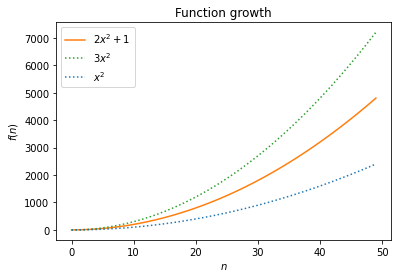

In [6]:
# Mostramos las respectivas funciones
plot_funs_theta(range(50), ys_f, leg_f, ys_low, leg_low,
                ys_high, leg_high, sup_only=False)

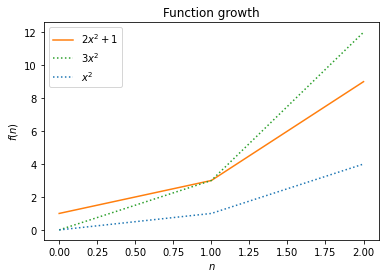

In [7]:
# Hacemos foco en el incio para verificar el n0 que hemos tomado
plot_funs_theta(range(3), ys_f, leg_f, ys_low, leg_low,
                ys_high, leg_high, sup_only=False)

Es decir, las funciones $3x^2$ y $x^2$ acotan a la función del tiempo de ejecución a partir de $n_0=1$ con lo que $$ t (n)  \in \Theta(n^2) $$

**Ejercicio 1.2 (0.75 puntos):**
Indicad la complejidad algorítmica $\Theta$ en relación al tiempo de ejecución del siguiente fragmento de código, justificando vuestra respuesta.

In [8]:
def foo2(n):
    """
    Args:
        n (:obj:`int`): a positive integer.
    """
    r = 0
    d1 = n
    while d1 > 1:
        b = d1 % 2
        d1 = d1//2
        if b == 1:
            r += 1
    if d1 == 1:
        r += 1
    return r

**Respuesta Ejercicio 1.2** En este caso, supongamos que el parámetro de entrada n tiene un tamaño _n_. Suponiendo que todas las instrucciones se ejecutan, nuestro algoritmo realiza las siguientes operaciones: dos asignaciones al principio, un bucle while en el que hay 3 operaciones y que se repite tantas veces como veces podemos dividir n entre 2 (lo cual es log2(n)) y una última asignación. Por tanto, el algoritmo `foo2` tiene un tiempo de ejecución de: 

$$ 1 + 1 + 3*log_2(n) + 1 = 3log_2(n) + 3 \in \Theta{(log(n))} $$

Ya que tomando, por ejemplo, los valores $c_1 = 3$, $c_2 = 6$, $n_0 = 7$ cumplimos con la definición vista en la teoría. Lo comprobamos visualmente:

In [9]:
# Definimos la función del tiempo de ejecución y las acotadoras
def ys_f(x): return 3*math.log(x, 2)+3


def ys_low(x): return 3*math.log(x)


def ys_high(x): return 6*math.log(x)


# Definimos las leyendas
leg_f = "$3log2(x)+3$"
leg_low = "$3log(x)$"
leg_high = "$6log(x)$"

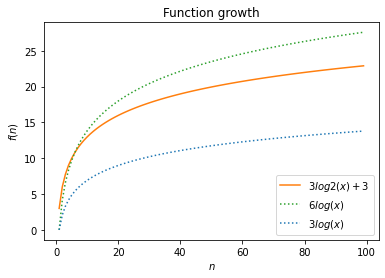

In [10]:
# Mostramos las respectivas funciones
plot_funs_theta(range(1, 100), ys_f, leg_f, ys_low, leg_low,
                ys_high, leg_high, sup_only=False)

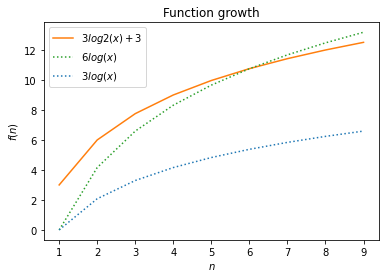

In [11]:
# Hacemos foco en el incio para verificar n0
plot_funs_theta(range(1, 10), ys_f, leg_f, ys_low, leg_low,
                ys_high, leg_high, sup_only=False)

Es decir, las funciones $6log(x)$ y $3log(x)$ acotan a la función del tiempo de ejecución a partir de $n_0=7$ con lo que

$$ t (n)  \in \Theta{(log(n))} $$

**Ejercicio 1.3 (0.75 puntos):**
Indicad la complejidad algorítmica $\mathcal{O}$ en relación al tiempo de ejecución del siguiente fragmento de código, justificando vuestra respuesta.

¿Qué se puede decir en este caso de $\Theta$? Justificar la respuesta.


In [12]:
def foo3(n):
    """
    Args:
        n (:obj:`int`): an integer value
    """
    r = 0
    if not n % 9:
        r -= 1
    else:
        while (n % 3 and n > 2):
            r += 1
            n = n//3
    return r

**Respuesta Ejercicio 1.3** En este caso, tenemos una función que, dependiendo del valor de n, realiza o una operación o como máximo una más dos por cada una de las veces que podemos dividir n entre 3 (lo cual es log3(n)). Es decir, nuestra función del tiempo de ejecución es 

$$\begin{equation}
  t(n) =
    \begin{cases}
      1 & \text{si $n$ es divisible entre 9}\\
      2log_3(n) + 1 & \text{en caso contrario}\\
    \end{cases}       
\end{equation}$$

de la cual podemos decir que $$ t (n)  \in \mathcal{O}{(log(n))} $$

Ya que tomando, por ejemplo, los valores $c_2 = 3$ y $n_0 = 3$ cumplimos con la definición vista en la teoría para $\mathcal{O}$, pero no podemos encontrar valores que nos garanticen la cota inferior para $\Theta$, pues cualquier logaritmo superará eventualmente el valor 1.

Veamos gráficamente la cota superior:

In [13]:
# Definimos la función del tiempo de ejecución y las acotadoras
def ys_f(x): return 2*math.log(x, 3)+1


def ys_high(x): return 3*math.log(x)


# Definimos las leyendas
leg_f = "$2log3(x)+1$"
leg_high = "$3log(x)$"

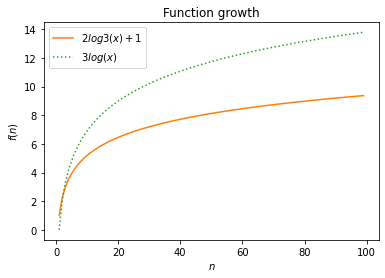

In [14]:
# Mostramos las respectivas funciones
plot_funs_theta(range(1, 100), ys_f, leg_f, ys_low, leg_low,
                ys_high, leg_high, sup_only=True)

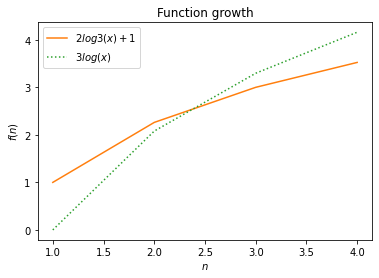

In [15]:
# Mostramos las respectivas funciones
plot_funs_theta(range(1, 5), ys_f, leg_f, ys_low, leg_low,
                ys_high, leg_high, sup_only=True)

Es decir, la función $3log(x)$ acota a la función del tiempo de ejecución a partir de $n_0=3$ con lo que

$$ t (n)  \in \mathcal{O}{(log(n))} $$

## Ejercicio 2

En este ejercicio analizaréis un fragmento de código con el objetivo de detectar las ineficiencias y, después, mejorarlo.

1. Utilizando las herramientas de *profiling* que hemos visto en el Notebook de teoría, analizad el siguiente fragmento de código ineficiente y encontrad cual es el cuello de botella. Explicad las ineficiencias que habéis detectado, relacionándolas con los resultados obtenidos en el *profiling*.

2. Mejorad el código con el objetivo de reducir el tiempo de ejecución.

<span style="font-family: Courier New; background-color: #82b74b; color: #000000; padding: 3px; ">SM</span> **(1.5 puntos)**



In [16]:
def reverse_list_while(L):
    """
     Reverse elements of a list
     
     Args:
         L (:obj: `list`) : list
     Returns:
         (:obj: `int`) : reverse list
    """
    i = len(L)
    L1 = []
    while(len(L1) != len(L)):
        if(i != 1):
            L1.append(L[i-1])
            i = i-1
        else:
            L1.append(L[0])
    return L1


L = list(range(1000000))
reverse_list_while(L)

[999999,
 999998,
 999997,
 999996,
 999995,
 999994,
 999993,
 999992,
 999991,
 999990,
 999989,
 999988,
 999987,
 999986,
 999985,
 999984,
 999983,
 999982,
 999981,
 999980,
 999979,
 999978,
 999977,
 999976,
 999975,
 999974,
 999973,
 999972,
 999971,
 999970,
 999969,
 999968,
 999967,
 999966,
 999965,
 999964,
 999963,
 999962,
 999961,
 999960,
 999959,
 999958,
 999957,
 999956,
 999955,
 999954,
 999953,
 999952,
 999951,
 999950,
 999949,
 999948,
 999947,
 999946,
 999945,
 999944,
 999943,
 999942,
 999941,
 999940,
 999939,
 999938,
 999937,
 999936,
 999935,
 999934,
 999933,
 999932,
 999931,
 999930,
 999929,
 999928,
 999927,
 999926,
 999925,
 999924,
 999923,
 999922,
 999921,
 999920,
 999919,
 999918,
 999917,
 999916,
 999915,
 999914,
 999913,
 999912,
 999911,
 999910,
 999909,
 999908,
 999907,
 999906,
 999905,
 999904,
 999903,
 999902,
 999901,
 999900,
 999899,
 999898,
 999897,
 999896,
 999895,
 999894,
 999893,
 999892,
 999891,
 999890,
 999889,
 

4:1: W293 blank line contains whitespace


In [17]:
# Respuesta

Comenzamos viendo el tiempo total de ejecución.

In [18]:
%timeit reverse_list_while(L)

1.64 s ± 171 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


Unos 1,23 segundos para nuestra lista de un millón de registros. Utilizamos ahora la instrucción mágica `lprun` para ver en detalle los tiempos de cada parte.

In [19]:
# Cargamos la extensión para poder utilizar 'lprun'
%load_ext line_profiler

In [20]:
# Ejecutamos la instrucción mágica 'lprun'
%lprun -f reverse_list_while reverse_list_while(L)

2:9: E225 missing whitespace around operator


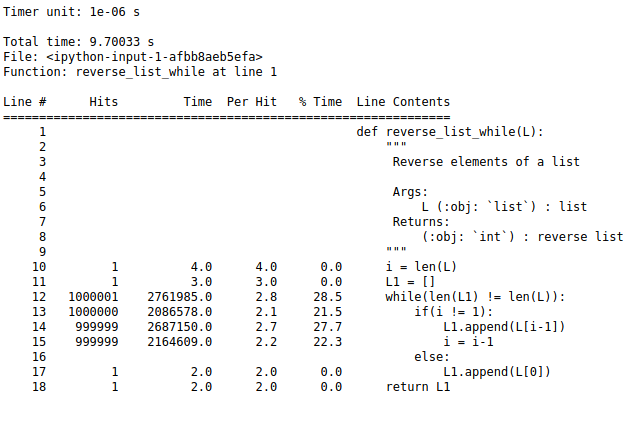

Como podíamos esperar, las líneas que más tiempo consumen son las del bucle _while_ en las que invierte el 28% en el propio bucle y entre el 21 y el 28% en las instrucciones internas.

Analizando el código, lo que hace para revertir la lista es recorrerla **entera** con un bucle **_while_** en el que necesita ir actualizando la variable **i**,  comprobando, además, con un **_if_** innecesario, si el elemento a añadir es el último o no. Comenzamos, pues, mejorando en código eliminando el _if_ :

In [21]:
def reverse_list_while_noif(L):
    """
     Reverse elements of a list

     Args:
         L (:obj: `list`) : list
     Returns:
         (:obj: `int`) : reverse list
    """
    i = len(L)
    L1 = []
    while(len(L1) != len(L)):
        L1.append(L[i-1])
        i = i-1
    return L1

In [22]:
# Comprobamos que llegamos al mismo resultado con la nueva función
reverse_list_while_noif(L) == reverse_list_while(L)

True

In [23]:
# Analizamos el tiempo de ejecución de la nueva función
%timeit reverse_list_while_noif(L)

In [24]:
# Ejecutamos la instrucción mágica 'lprun'
%lprun -f reverse_list_while_noif reverse_list_while_noif(L)

2:9: E225 missing whitespace around operator


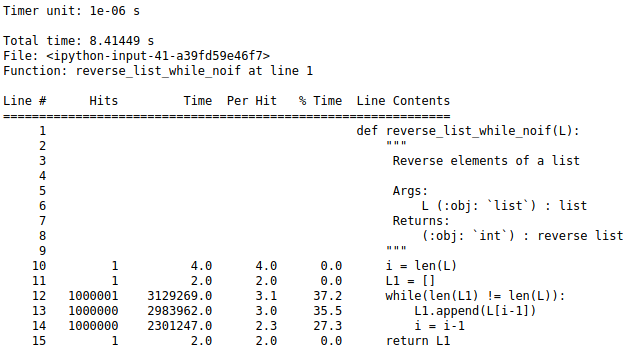

Eliminando el _if_ , hemos bajado a unos 1,16 segundos globales. El bucle sigue llevándose la mayor parte del tiempo y tanto esta como las instrucciones internas han aumentado ligeramente ya que ahora realizan un hit más (el que antes correspondía al _if_ )

Por otro lado, podemos seguir mejorando el código sustituyendo el bucle _while_ por un bucle _for_ , pues así evitamos realizar "nosotros" la actualización del la variable i:

In [54]:
def reverse_list_for(L):
    """
     Reverse elements of a list

     Args:
         L (:obj: `list`) : list
     Returns:
         (:obj: `int`) : reverse list
    """
    L1 = []
    for i in range(0, -len(L), -1):
        L1.append(L[i-1])
    return L1

In [26]:
# Comprobamos que llegamos al mismo resultado con la nueva función
reverse_list_for(L) == reverse_list_while(L)

True

In [27]:
# Analizamos el tiempo de ejecución de la nueva función
%timeit reverse_list_for(L)

In [28]:
# Ejecutamos la instrucción mágica 'lprun'
%lprun -f reverse_list_for reverse_list_for(L)

2:9: E225 missing whitespace around operator


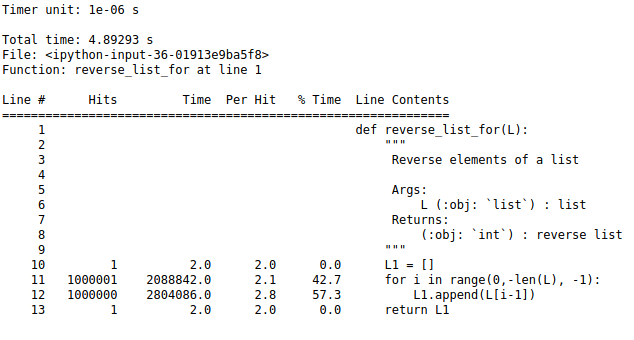

Con nuestro nuevo código, utilizando un bucle _for_ hemos mejorado considerablemente el tiempo de ejecución (lo hemos reducido algo más de la mitad) ya que evitamos la inicialización de i y sus respectivas reasignaciones.

Finalmente, vamos a probar otra forma de revertir la lista: recorrerla la mitad de veces actualizando a la vez el principio y el final:

In [29]:
def reverse_list_for_half(L):
    """
     Reverse elements of a list

     Args:
         L (:obj: `list`) : list
     Returns:
         (:obj: `int`) : reverse list
    """
    L1 = L
    for i in range(0, len(L)//2):
        L1[i] = L[-1*i-1]
        L1[-1*i-1] = L[i]
    return L1

In [30]:
# Comprobamos que llegamos al mismo resultado con la nueva función
reverse_list_for_half(L) == reverse_list_while(L)

True

In [31]:
# Analizamos el tiempo de ejecución de la nueva función
%timeit reverse_list_for_half(L)

In [32]:
# Ejecutamos la instrucción mágica 'lprun'
%lprun -f reverse_list_for_half reverse_list_for_half(L)

2:9: E225 missing whitespace around operator


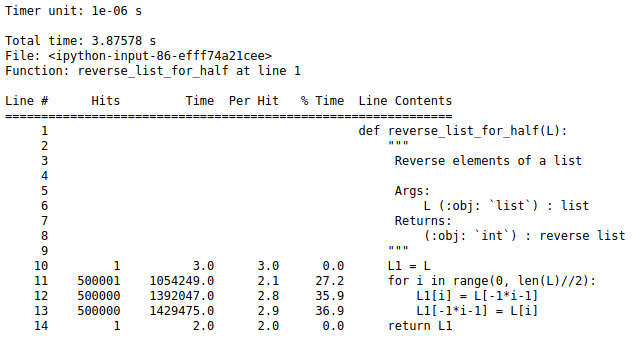

Con esto, hemos llegado a reducir un segundo más el tiempo total de ejecución pasando a ser 3,9 segundos, un tercio del tiempo que necesitaba la función original, ya que el for tiene que ejecutarse solo la mitad de la longitud de la lista.

## Ejercicio 3

En este ejercicio analizaréis un fragmento de código con el objetivo de detectar las ineficiencias y, después, mejorarlo.

1. Utilizando las herramientas de *profiling* que hemos visto en el Notebook de teoría, analizad el siguiente fragmento de código ineficiente y encontrad cual es el cuello de botella. Explicad las ineficiencias que habéis detectado, relacionándolas con los resultados obtenidos en el *profiling*.

2. Mejorad el código con el objetivo de reducir el tiempo de ejecución.

<span style="font-family: Courier New; background-color: #82b74b; color: #000000; padding: 3px; ">SM</span> **(1.5 puntos)**

In [53]:
from random import randint


def count_appearence(iters, n):
    """
     Given a number n, generates a random list of 'iters'
     number of elements between [-10*n,10*n] and count how many times
     our input n appears in the random list.

     Args:
         iters (:obj: `int`) : integer, number of random elements to generate
         n (:obj: `int`) : integer, number to count appearences
     Returns:
         (:obj: `int`) : integer, number of times that n
         appears in the generated random list.
    """
    c = 0
    L = []
    for i in range(iters):
        L.append(randint(-10*n, 10*n))
    for j in L:
        if j == n:
            c += 1
    return c


iters, n = int(1e6), int(1e2)
count_appearence(iters, n)

508

In [55]:
# Respuesta

In [35]:
# Comenzamos viendo el tiempo de ejecución de la función
%timeit count_appearence(iters, n)

In [36]:
# Ejecutamos la instrucción mágica 'lprun'
%lprun -f count_appearence count_appearence(iters, n)

2:9: E225 missing whitespace around operator


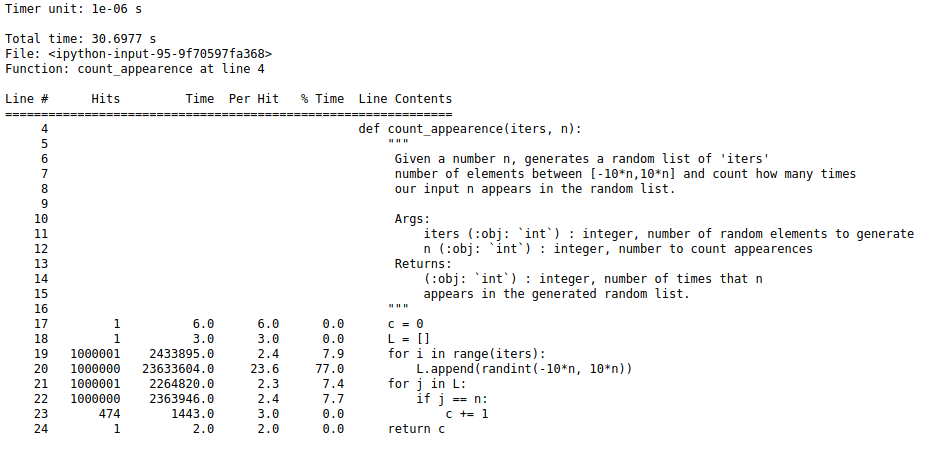

Analizando la función, lo que buscamos es ver cuántas veces aparece un número _n_ en una lista de números aleatorios generados entre -10*n y 10*n. El paso que más tiempo lleva es el calcular los números aleatorios e irlos agregando a la lista. Además, en vez de aprovechar ese bucle para hacer la comprobación, vuelve a recorrer la lista para ver cuantas veces aparece _n_ . Comenzamos viendo cómo mejora el tiempo de ejecución al hacerlo todo en un solo bucle:

In [56]:
def count_appearence_onefor(iters, n):
    """
     Given a number n, generates a random list of 'iters'
     number of elements between [-10*n,10*n] and count how many times
     our input n appears in the random list.

     Args:
         iters (:obj: `int`) : integer, number of random elements to generate
         n (:obj: `int`) : integer, number to count appearences
     Returns:
         (:obj: `int`) : integer, number of times that n
         appears in the generated random list.
    """
    c = 0
    L = []
    for i in range(iters):
        L.append(randint(-10*n, 10*n))
        if L[i] == n:
            c += 1
    return c

In [38]:
# Analizamos el tiempo de ejecución de la nueva función
%timeit count_appearence_onefor(iters, n)

In [39]:
# Ejecutamos la instrucción mágica 'lprun'
%lprun -f count_appearence_onefor count_appearence_onefor(iters, n)

2:9: E225 missing whitespace around operator


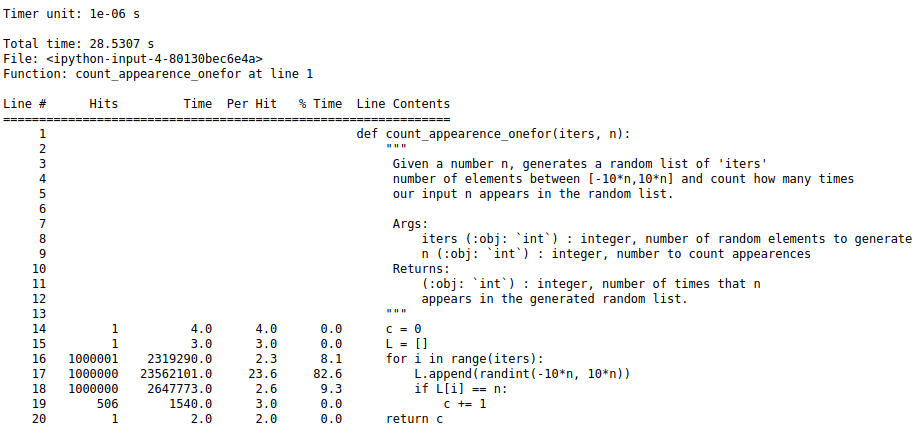

Con esta mejora, hemos conseguido reducir el tiempo en dos segundos, los que necesitaba la función para el segundo _for_ . El resto de líneas siguen manteniendo más o menos los mismos tiempos aunque, por ejemplo, como la línea en la que aumentamos el valor de _c_ depende de si el número aleatorio coincide o no con _n_ , esta línea llevará más o menos tiempo dependiendo de la ejecución.

Finalmente, como lo único que estamos devolviendo de la función es el número de apariciones, nos plantemos no generar y guardar la lista ya que después no la utilizamos. En ese caso, el código sería el siguiente:

In [40]:
def count_appearence_nofor(iters, n):
    """
     Given a number n, generates 'iters' numbers
     between [-10*n,10*n] and count how many times
     our input n is equal to the random number.

     Args:
         iters (:obj: `int`) : integer, number of random elements to generate
         n (:obj: `int`) : integer, number to count appearences
     Returns:
         (:obj: `int`) : integer, number of times that n
         is equal to the random number.
    """
    c = 0
    for i in range(iters):
        if randint(-10*n, 10*n) == n:
            c += 1
    return c

In [41]:
# Analizamos el tiempo de ejecución de la nueva función
%timeit count_appearence_nofor(iters, n)

In [42]:
# Ejecutamos la instrucción mágica 'lprun'
%lprun -f count_appearence_nofor count_appearence_nofor(iters, n)

2:9: E225 missing whitespace around operator


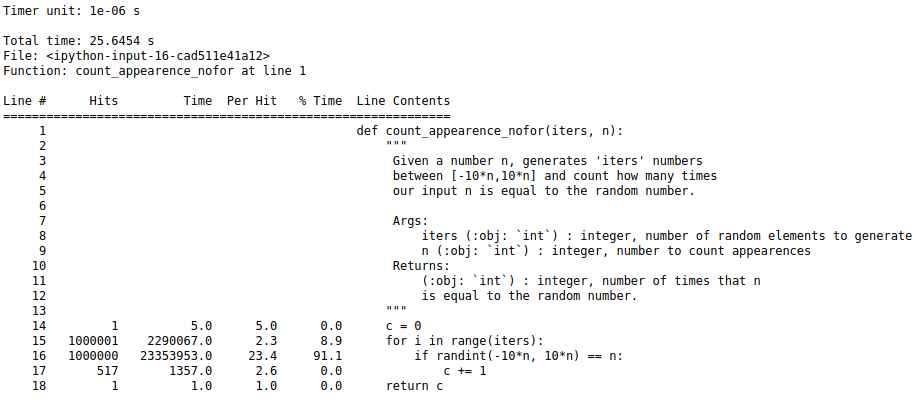

Con esto hemos conseguido reducir el tiempo en 5 segundos con respecto a la función original al eliminar el paso en el que añadimos el número aleatorio a la lista y también evitamos la inicialización de la misma.

## Ejercicio 4

En una oferta de trabajo de analista de datos para la empresa Uber se nos pide analizar la distribución del uso de su servicio en la ciudad de New York. Para hacerlo, nos han proporcionado un conjunto de datos relativamente grande con datos diarios del uso de sus servicios entre los meses de abril y septiembre del 2014. Dónde **servicio**: entrada en el conjunto de datos.


Se nos pide que:

 a) encontremos el recuento total de sevicios agrupados por base, y que mostremos el resultado gráficamente utilizando un diagrama de barras donde el eje `x` represente la base, y el eje `y` represente el número de servicios. 
 
 b) encontremos el porcentaje de servicios durante el fin de semana (sábado y domingo) respecto el total de servicios semanales agrupados por base, y que mostremos el resultado gráficamente utilizando un diagrama de barras donde el eje `x` represente la base, y el eje `y` represente el porcentaje.
 
*Aclaración*: el porcentaje será calculado sobre el número total de servicios semanales de cada base. 

Podéis encontrar los datos a analizar en el directorio `data`.

1. Implementad **una solución secuencial** al problema planteado por el enunciado.
2. Justificad si podéis reducir el tiempo de ejecución utilizando o bien múltiples *threads* o bien múltiples procesos.
3. Implementad **una** solución *multiprocess* o *multithreaded* que reduzca el tiempo de ejecución (respecto a la solución secuencial).
4. Comentad (en un par de líneas) los gráficos obtenidos.

Podéis encontrar los datos originales [aquí](https://github.com/fivethirtyeight/uber-tlc-foil-response/tree/master/uber-trip-data).

<span style="font-family: Courier New; background-color: #82b74b; color: #000000; padding: 3px; ">SM</span> **(3 puntos)**

In [43]:
# Respuesta

# Solución secuencial

# Importamos las librerías que vamos a necesitar
import os
import matplotlib.pyplot as plt
import datetime as dt

# Comenzamos creando una función que nos permita leer los ficheros
# extrayendo las bases que hay y las apariciones de cada una de ellas,
# así como cuántas corresponden a un día del fin de semana.


# Vamos a reutilizar la función de lectura vista en la teoría.
def read_bases(file_input):
    """
    Lee el fichero dado línea a línea y cuenta el número de
    registros por base.
    Devuelve un diccionario con las bases como clave y una lista
    con el número total de apariciones y las que corresponden
    a días del fin de semana.
    """
    # Inicializamos el diccionario
    base = dict()
    # Abrimos el fichero y tomamos las líneas
    with open(file_input) as f:
        headers = f.readline()
        data = f.readlines()
        # Recorremos cada línea (servicio)
        for line in data:
            # Nombre de la base
            basename = line.split(',')[3].split('"')[1]
            if basename not in base:
                base[basename] = list([0, 0])
            # Incrementamos en uno el total de registros de la base
            base[basename][0] += 1
            # Extraemos la fecha y, si es fin de semana, incrementamos
            # el total de registros del fin de semana
            date = line.split(',')[0].split('"')[1].split(' ')[0]
            wd = dt.datetime.strptime(date, '%m/%d/%Y').weekday()
            if wd > 4:
                base[basename][1] += 1
    return base


# Creamos ahora una función que saque la lista de archivos de
# un directorio
def archives_list(directory):
    """
    Devuelve una lista con los archivos de un directorio.
    """
    # Sacamos una lista con la ruta completa de los archivos
    archives = os.listdir(directory)
    arch_directory = [os.path.join(directory, archive) for archive in archives]
    return arch_directory


# Finalmente, creamos una función que, dada una lista de archivos,
# acumule en un diccionario el número de servicios por base
def total_services(list_archives):
    """
    Devuelve un diccionario con listas en la que primero
    está el total de servicios en la base y, en el segundo,
    los servicios en fin de semana de la base.
    Cada base es una clave del diccionario.
    """
    # Inicializamos el diccionario
    bases = dict()

    # Recorremos la lista de archivos y actualizamos el diccionario
    # con los servicios por base
    for archive in list_archives:
        base = read_bases(archive)
        for k, v in base.items():
            if k in bases:
                bases[k] = [x + y for x, y in zip(bases[k], v)]
            else:
                bases[k] = v
    return bases

In [44]:
%%time

# Llamamos a la función para extraer los servicios totales
total_services = total_services(archives_list('./data'))

# Mostramos los valores obtenidos
# (Base, uso total y uso en fin de semana)
total_services

{'B02512': [205673, 47263],
 'B02598': [1393113, 345484],
 'B02617': [1458853, 371006],
 'B02682': [1212789, 296671],
 'B02764': [263899, 75870]}

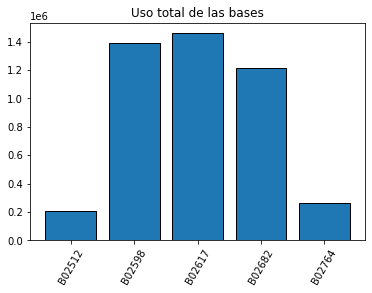

In [45]:
# Mostramos la gráfica con los totales
b = [base for base in total_services.keys()]
v = [value[0] for value in total_services.values()]

plt.bar(range(len(b)), v, edgecolor='black')

plt.xticks(range(len(b)), b, rotation=60)
plt.title("Uso total de las bases")
plt.show()

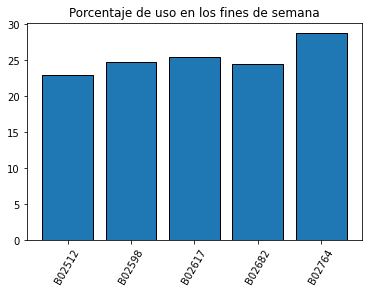

In [46]:
# Mostramos la gráfica con los porcentajes de uso
# en fin de semana
b = [base for base in total_services.keys()]
v = [value[1]/value[0]*100 for value in total_services.values()]

plt.bar(range(len(b)), v, edgecolor='black')

plt.xticks(range(len(b)), b, rotation=60)
plt.title("Porcentaje de uso en los fines de semana")
plt.show()

La solución secuencial ha requerido de casi 3 minutos de ejecución (sin contar con las representaciones gráficas).

Observamos que necesitamos llamar a la función que lee los archivos tantas veces como archivos tenemos y que, realmente, estas llamadas son independientes. Es decir, no necesitamos esperar a que haya acabado la lectura y recopilación de datos de un fichero para hacer lo mismo con otro. 

Por eso, podemos reducir el tiempo de ejecución si implementamos una solución concurrente o paralela. En nuestro caso, como vamos a recurrir a la CPU para realizar las actualizaciones de cuántos servicios se han realizado por base, nos decantamos por una solución _multiprocess_ con la que trabajaremos en paralelo ya que, si lo hiciesemos con distintos hilos, estos necesitarían tiempo de cómputo en a la CPU y no ganaríamos tiempo (incluso podría ser peor solución que la secuencial).

Implementamos a continuación la solución _multiprocess_ :

In [47]:
# Solución multiprocess
# (Hemos reutilizado funciones vistas en la teoría)
from multiprocessing import Process
import logging
from multiprocessing import JoinableQueue, Queue
import sys

# Configuramos el logging con el que iremos viendo las ejecuciones
log_format = '[%(process)d]\t%(asctime)s %(levelname)s: %(message)s'
logging.basicConfig(format=log_format, level=logging.INFO, datefmt="%H:%M:%S",
                    handlers=[logging.StreamHandler(sys.stdout)])


# Definimos la función con la que cada proceso se irá encargando
# de las distintas tareas hasta que no quede ninguna
def get_services(p_index, archives_q, results_q):
    """
    Asigna a cada proceso la tarea de lectura y obtención del
    diccionario con el uso de las bases para los distintos archivos.
    Finaliza cuando no quedan tareas (archivos) por realizar.
    """
    logging.info("[P{}]\tStarted".format(p_index))

    # Obtenemos la primera tarea
    archive = archives_q.get()
    # Mientras haya tareas pendientes, las realizamos
    while archive:
        logging.info("[P{}]\tStarting to work on {}".format(p_index, archive))
        # Leemos el archivo
        base = read_bases(archive)
        logging.info("[P{}]\tResult is {}".format(p_index, base))
        # Guardamos el resultado en la cola de resultados
        results_q.put(base)
        # Indicamos que hemos finalizado la tarea
        archives_q.task_done()
        # Obtenemos la próxima tarea
        archive = archives_q.get()

    logging.info("[P{}]\tEnding".format(p_index))
    # Indicamos que hemos finalizado la última tarea obtenida de la cola
    archives_q.task_done()
    logging.info("[P{}]\tThread ended".format(p_index))


# Definimos la función que inicia los procesos y los va dirigiendo a
# la función anterior. Además, recopila el total de los resultados
def get_total_services(archives, num_processes):
    """
    Inicia los procesos con los que ejecutaremos las tareas sobre
    los archivos.
    Al final, recopila en un único diccionario todos los datos
    de uso de las bases.
    """
    # Creamos la cola de resultados
    results_q = Queue()
    # Creamos la cola de tareas que realizar
    archives_q = JoinableQueue()
    # Añadimos los archivos a la cola de tareas
    for archive in archives:
        archives_q.put(archive)

    # Añadimos un indicador de final de tarea al final de la lista
    # de tareas para cada proceso
    for _ in range(num_processes):
        archives_q.put(None)

    # Iniciamos los `num_processes` procesos con la tarea de obtener
    # los servicios por base
    for i in range(num_processes):
        process = Process(target=get_services, args=(i, archives_q, results_q))
        process.start()

    # Esperamos a que se hayan completado todas las tareas
    logging.info("[M]\tWaiting to join processes")
    archives_q.join()
    logging.info("[M]\tProcesses joined!")
    # Inicializamos el diccionario final
    r_dict = {}
    # Cuando tenemos resultados, actualizamos el diccionario
    # final.
    while not results_q.empty():
        e = results_q.get()
        for k, v in e.items():
            if k in r_dict:
                r_dict[k] = [x + y for x, y in zip(r_dict[k], v)]
            else:
                r_dict[k] = v

    return r_dict

In [48]:
%%time

# Ejecutamos la función con nuestra lista de archivos
archives = archives_list('./data')
total_services = get_total_services(archives, 2)

# Mostramos los valores obtenidos
# (Base, uso total y uso en fin de semana)
total_services

{'B02512': [205673, 47263],
 'B02598': [1393113, 345484],
 'B02617': [1458853, 371006],
 'B02682': [1212789, 296671],
 'B02764': [263899, 75870]}

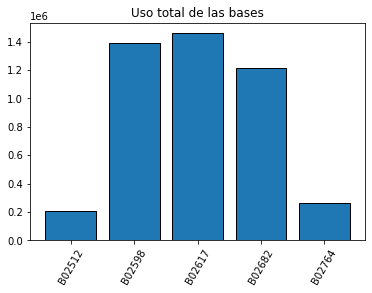

In [49]:
# Mostramos la gráfica con los totales
b = [base for base in total_services.keys()]
v = [value[0] for value in total_services.values()]

plt.bar(range(len(b)), v, edgecolor='black')

plt.xticks(range(len(b)), b, rotation=60)
plt.title("Uso total de las bases")
plt.show()

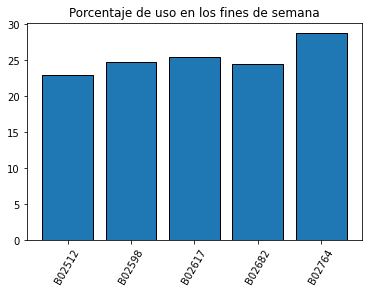

In [50]:
# Mostramos la gráfica con los porcentajes de uso
# en fin de semana
b = [base for base in total_services.keys()]
v = [value[1]/value[0]*100 for value in total_services.values()]

plt.bar(range(len(b)), v, edgecolor='black')

plt.xticks(range(len(b)), b, rotation=60)
plt.title("Porcentaje de uso en los fines de semana")
plt.show()

Con la solución _multiprocess_ terminamos la ejecución en 1,46 minutos, con lo que hemos reducido el tiempo en un minuto con respecto a la secuencial.

Comentar que hemos analizado los tiempos de ejecución de ambas soluciones, secuencial y en paralelo, sin tener en cuenta las representaciones de las gráficas pues estas se pueden realizar una vez finalizadas las respectivas soluciones e impactarían de la misma forma en ambas.

Con respecto a la información que podemos extraer de las gráficas, vemos que hay un total de 5 bases siendo las más utilizadas la B02598, la B02617 y la B02682 con alrededor de un millón cuatrocientos servicios frente a los aproximadamente doscientos mil de las otras dos bases. El uso en los fines de semana es bastante similiar en todas ellas, rondando el 25% y siendo la B02764, una de las que menos uso total tiene, la que alcanza el mayor porcentaje (30%)

Nota: incluimos comentado el código de la posible solución _multithreaded_ , ya que se ha estudiado para comprobar que el tiempo de ejecución era peor que en los otros casos.

In [57]:
# # Solución multithreaded
# from threading import Thread
# from threading import Lock

# def get_services(t_index, archives_q, lock, bases_dict):
#     """
#     Asigna la tarea de obtener los usos por base
#     a los distintos threads.

#     Finaliza cuando ya no hay tareas por realizar.
#     """
#     logging.info("[T{}]\tStarted".format(t_index))

#     # Obtenemos la primera tarea
#     archive = archives_q.get()
#     # Mientras haya tareas pendientes, las realizamos
#     while archive:
#         logging.info("[T{}]\tStarting to work {}".format(t_index, archive))
#         base = read_bases(archive)
#         logging.info("[T{}]\tResult is {}".format(t_index, base))
#         # Guardamos el resultado en el diccionario de resultados, obteniendo
#         # primero el lock y liberándolo cuando acabemos la actualización
#         lock.acquire()
#         for k, v in base.items():
#             if k in bases_dict:
#                 bases_dict[k] = [x + y for x, y in zip(bases_dict[k], v)]
#             else:
#                 bases_dict[k] = v
#         lock.release()
#         # Indicamos que hemos finalizado la tarea
#         archives_q.task_done()
#         # Obtenemos la próxima tarea
#         archive = archives_q.get()

#     logging.info("[T{}]\tEnding".format(t_index))
#     # Indicamos que hemos finalizado la última tarea obtenida de la cola
#     # (que era None, el marcador de final de tareas)
#     archives_q.task_done()
#     logging.info("[T{}]\tThread ended".format(t_index))


# def get_total_services(archives, num_threads, lock, bases_dict):
#     """
#     Pone en ejecución los distintos threads con los que vamos
#     a obtener el uso de las bases de Uber.
#     """

#     # Creamos la cola de tareas a realizar
#     archives_q = JoinableQueue()
#     # Añadimos los archivos a la cola de tareas
#     for archive in archives:
#         archives_q.put(archive)

#     # Añadimos un indicador de final de tarea al final de la lista
#     # de tareas para cada thread
#     for _ in range(num_threads):
#         archives_q.put(None)

#     # Iniciamos los `num_threads` hilos con la tarea de obtener
#     # el uso de las bases
#     for i in range(num_threads):
#         thread = Thread(target=get_services,
#                         args=(i, archives_q, lock, bases_dict))
#         thread.start()

#     # Esperamos a que se hayan completado todas las tareas
#     logging.info("[M]\tWaiting to join threads")
#     archives_q.join()
#     logging.info("[M]\tThreads joined!")

In [52]:
# %%time

# archives = archives_list('./data')
# lock = Lock()
# bases_dict = dict()
# get_total_services(archives, 4, lock, bases_dict)

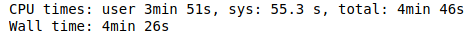

Supone un tiempo de ejecución de más de 4 minutos.

## Referencias

Además de las unidades del curso, especialmente la 4 y la 5, han sido también de utilidad los siguientes recursos:

**Consultas**

- **_default dict of zero_** https://stackoverflow.com/questions/31838823/create-a-defaultdict-with-a-default-of-zero-0
- **_Gráficos_** https://www.hektorprofe.net/curso/visualizacion-graficos-matplotlib-python/tipos-de-graficos
- **_SUM two lists_** https://stackoverflow.com/questions/14050824/add-sum-of-values-of-two-lists-into-new-list
- **_pickle objects multiprocessing_** https://docs.python.org/3/library/pickle.html#what-can-be-pickled-and-unpickled
- **_brackets markdown_** https://tex.stackexchange.com/questions/337351/multiple-lines-one-side-of-equation-with-a-curly-bracket/337352